In [1]:
# Importing the libraries needed to perform tasks

# For data wrangling and munging
import pandas as pd
import numpy as np

#For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#For Machine Learning modelling
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error



In [2]:
data = pd.read_csv("E:/Data Science/CSV dataset/New Datasets/vgsales.csv")
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [3]:
#Checking for missing values in the dataset

data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

*****************************

Observation :: 

* Since Year and Publisher have missing values hence filling the values before proceeding further. 

In [4]:
# Checking for unique values and their frequency in the year column

data['Year'].value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

* Since the range is big hence will now check for mean value of Year if that can be used in place of missing values

# Filling missing values ::

In [5]:
# Calculating mean of Year column

mean_year = int(data['Year'].mean())
print('Mean Value of Year column is:: ',mean_year)

Mean Value of Year column is::  2006


In [6]:
# Filling the missing values in Year column with ffill method and checking if it fills all the values

data['Year'].fillna(method = 'ffill', axis = 0)

print('Total NaN values present after using Forward Fill Method :: ', data['Year'].isnull().sum())

Total NaN values present after using Forward Fill Method ::  271


<< Observation >> 

* Since Forward Fill method failed to fill all the values hence using the mean values to fill the missing values


In [7]:
data['Year'].fillna(mean_year, axis = 0, inplace = True)

print('Total NaN values present after using Mean value :: ', data['Year'].isnull().sum())

Total NaN values present after using Mean value ::  0


In [8]:
# Changing the data type of Year column from float to integer values

data['Year'] = data['Year'].astype(int)
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [9]:
# Filling the missing Publisher values present

# Checking for unique values and their frequency in the year Publisher

data['Publisher'].value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
CPG Products                       1
UIG Entertainment                  1
BushiRoad                          1
Strategy First                     1
TOHO                               1
Name: Publisher, Length: 578, dtype: int64

In [10]:
# Filling the missing values in Publisher column with ffill method and checking if it fills all the values

data['Publisher'].fillna(method = 'ffill', axis = 0, inplace = True)

print('Total NaN values present after using Forward Fill Method :: ', data['Publisher'].isnull().sum())

Total NaN values present after using Forward Fill Method ::  0


* All the missing values are taken care of hence we can proceed to the visualization part

*************** 
# Data Visualization ::

In [11]:
# Checking the data types of the columns 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int32  
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.3+ MB


<< Observation >> 

  * 4 Columns - Categorial Data
  * 7 Columns - Continuous Data
  * 0 Columns - Date time Data

In [12]:
data['Platform'].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [13]:
data['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

Text(0.5, 1.0, 'EU SALES')

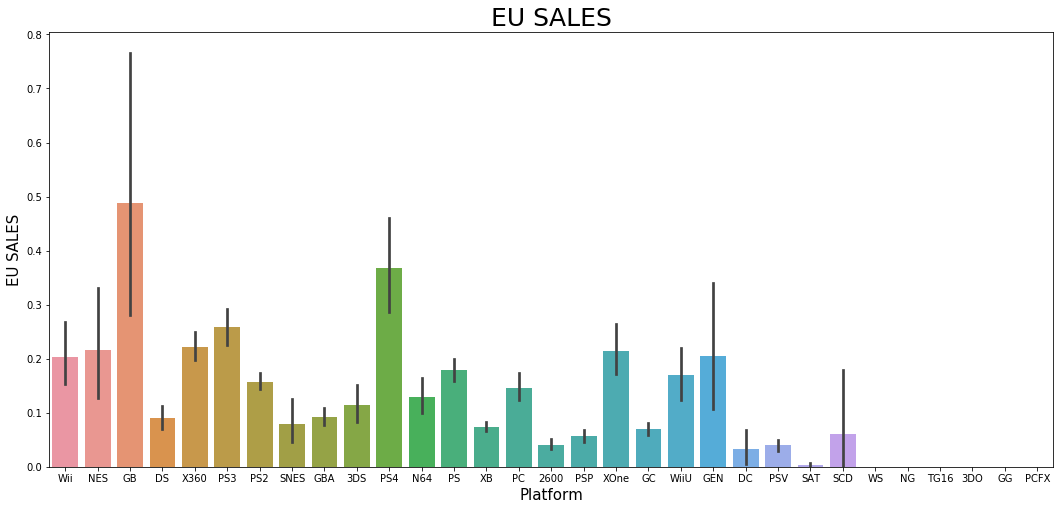

In [14]:
# Plotting the barlot 

fig, ax = plt.subplots(figsize = (18,8))
sns.barplot(x = 'Platform', y = 'EU_Sales', ax = ax, data = data)
plt.ylabel('EU SALES', fontsize = 15)
plt.xlabel('Platform', fontsize = 15)
plt.title('EU SALES', fontsize = 25)

Text(0.5, 1.0, 'North America SALES')

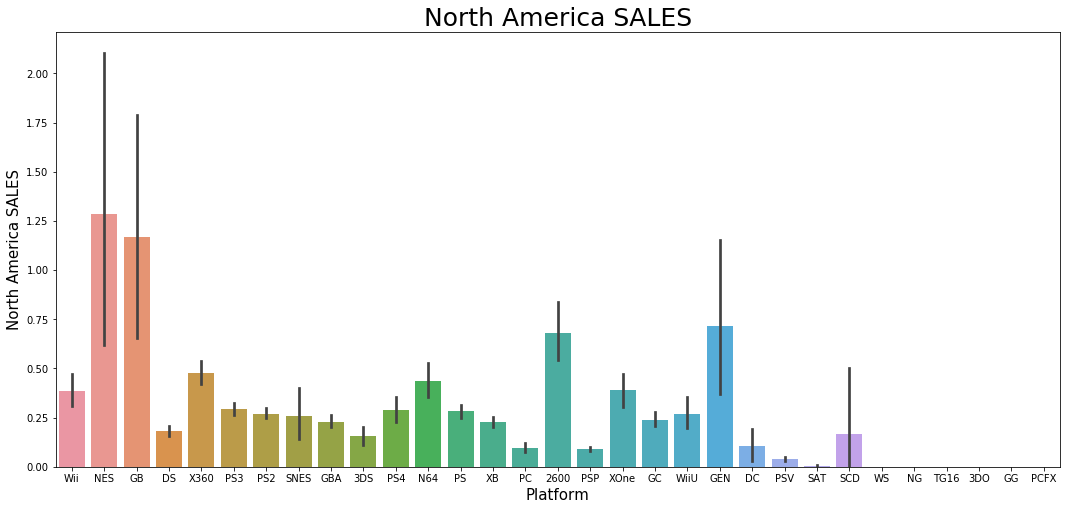

In [15]:
# Plotting the barlot 

fig, ax = plt.subplots(figsize = (18,8))
sns.barplot(x = 'Platform', y = 'NA_Sales', ax = ax, data = data)
plt.ylabel('North America SALES', fontsize = 15)
plt.xlabel('Platform', fontsize = 15)
plt.title('North America SALES', fontsize = 25)

Text(0.5, 1.0, 'JP SALES')

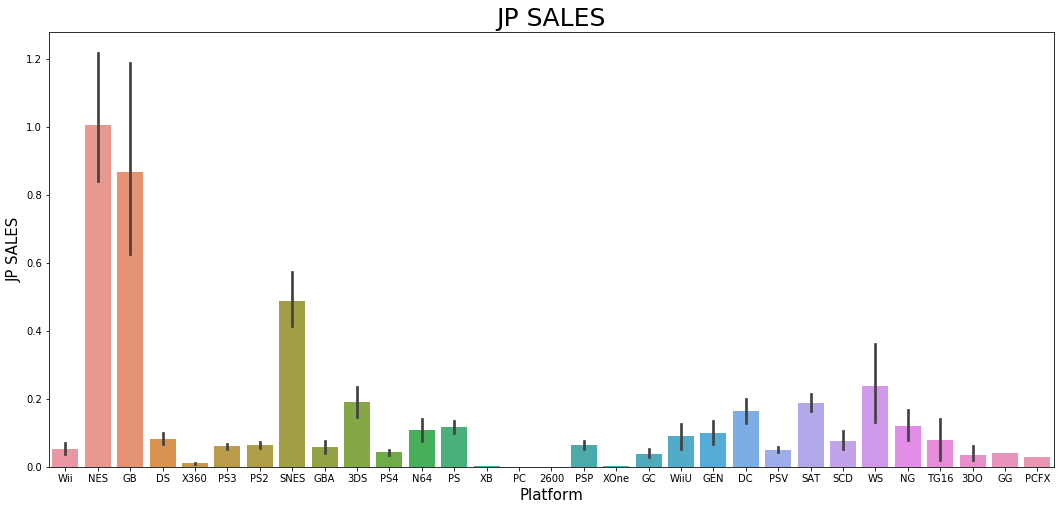

In [16]:
# Plotting the barlot 

fig, ax = plt.subplots(figsize = (18,8))
sns.barplot(x = 'Platform', y = 'JP_Sales', ax = ax, data = data)
plt.ylabel('JP SALES', fontsize = 15)
plt.xlabel('Platform', fontsize = 15)
plt.title('JP SALES', fontsize = 25)

Text(0.5, 1.0, 'Global SALES Platform Wise')

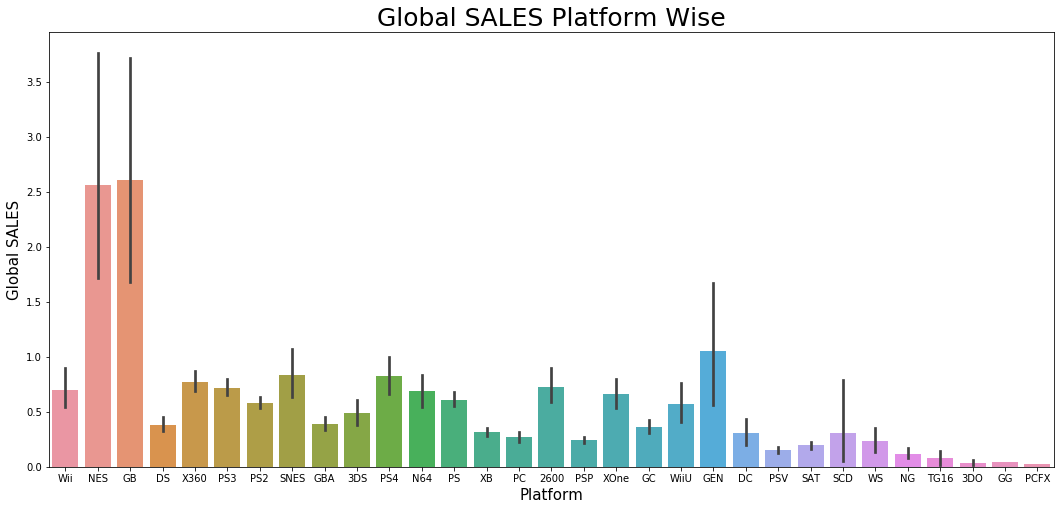

In [17]:
# Plotting the barlot 

fig, ax = plt.subplots(figsize = (18,8))
sns.barplot(x = 'Platform', y = 'Global_Sales', ax = ax, data = data)
plt.ylabel('Global SALES', fontsize = 15)
plt.xlabel('Platform', fontsize = 15)
plt.title('Global SALES Platform Wise', fontsize = 25)

Text(0.5, 1.0, 'Global SALES Genre Wise')

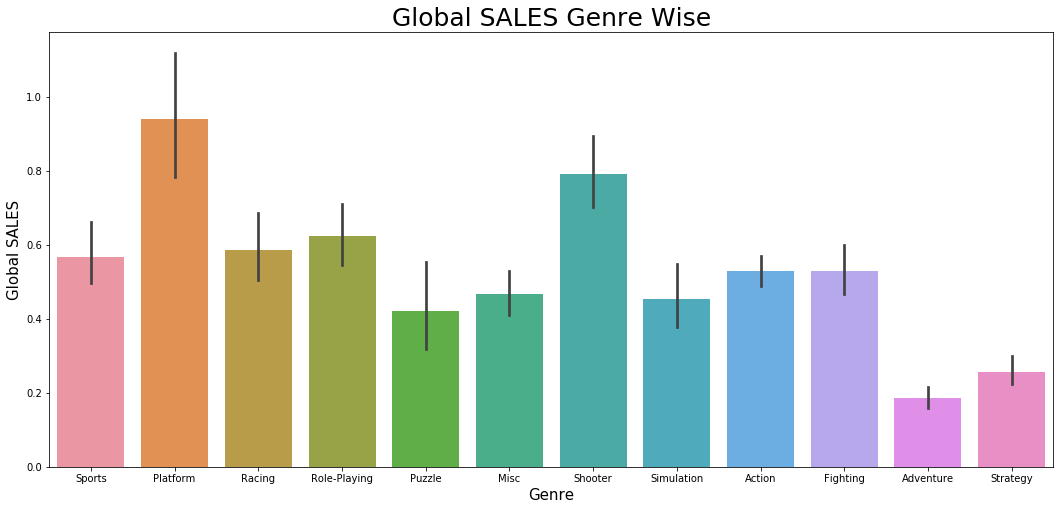

In [18]:
# Plotting the barlot 

fig, ax = plt.subplots(figsize = (18,8))
sns.barplot(x = 'Genre', y = 'Global_Sales', ax = ax, data = data)
plt.ylabel('Global SALES', fontsize = 15)
plt.xlabel('Genre', fontsize = 15)
plt.title('Global SALES Genre Wise', fontsize = 25)

Text(0.5, 1.0, 'European Union SALES')

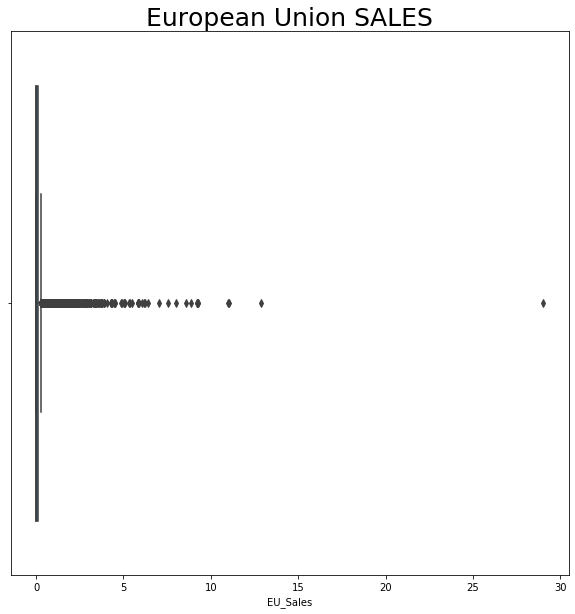

In [19]:
# Making boxplots to visualize the various sales and check for any outliers 

fig, ax = plt.subplots(figsize = (10,10))
sns.boxplot(data['EU_Sales'])
plt.title('European Union SALES', fontsize = 25)

Text(0.5, 1.0, 'North America SALES')

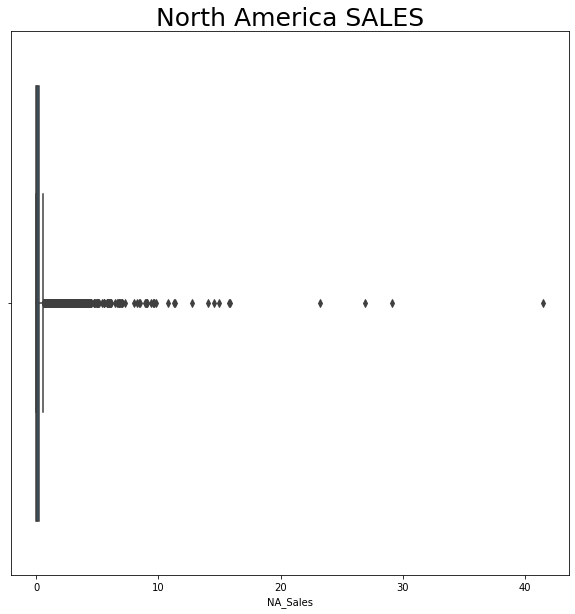

In [20]:
fig, ax = plt.subplots(figsize = (10,10))
sns.boxplot(data['NA_Sales'])
plt.title('North America SALES', fontsize = 25)

Text(0.5, 1.0, 'JP SALES')

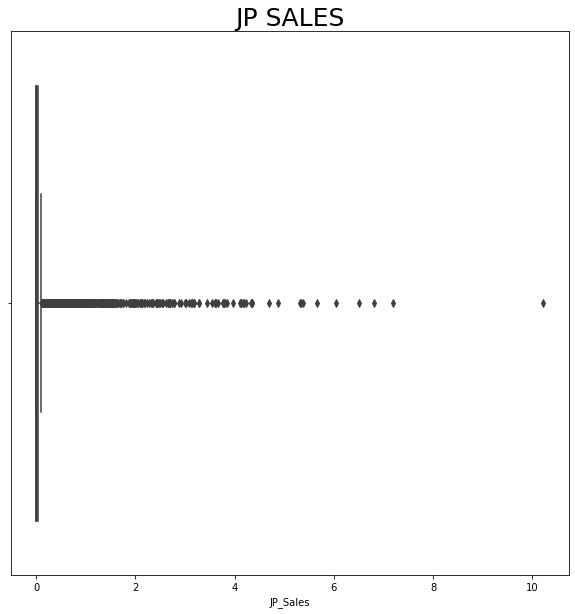

In [21]:
fig, ax = plt.subplots(figsize = (10,10))
sns.boxplot(data['JP_Sales'])
plt.title('JP SALES', fontsize = 25)

<< Observation >>

  * All three Sales columns have Outliers in considerable numbers. 
  * Hence we have to take care of the outliers so that they don't hampers with sales prediction

In [22]:
# Creating Pivot Table to help visulalizing data more clearly

table1 = data.pivot_table(index = ['Genre'], values = ['NA_Sales', 'EU_Sales', 'JP_Sales'], margins = True)
table1

,EU_Sales,JP_Sales,NA_Sales
Genre,,,
Action,0.158323,0.048236,0.264726
Adventure,0.049868,0.040490,0.082271
Fighting,0.119481,0.103007,0.263667
Misc,0.124198,0.061967,0.235906
Platform,0.227573,0.147596,0.504571
Puzzle,0.087251,0.098471,0.212680
Racing,0.190865,0.045388,0.287766
Role-Playing,0.126384,0.236767,0.219946
Shooter,0.239137,0.029221,0.444733
